In [43]:
import requests
from bs4 import BeautifulSoup


def get_all_article_url(url):
    r = requests.get(url)
    soup = BeautifulSoup(r.text, "html5lib")
    divs = soup.find_all('div', {'class':'thread-item'})
    # 取得所有文章連結
    article_urls = ['https://pttweb.tw' + div.find('a')['href'] for div in divs]

    return article_urls

# 第一頁，取得所有文章連結
article_url_list = []
url = 'https://pttweb.tw/hot-threads'
article_urls = get_all_article_url(url)
article_url_list += article_urls

next_page_url_patter = 'https://pttweb.tw/hot-threads?page={page_num}'

# 翻頁取得所有文章連結，避免資料量太大，只翻10頁
page_max = 12

for i in range(2,page_max):
    next_url = next_page_url_patter.format(page_num=i)
    article_urls  = get_all_article_url(next_url)
    article_url_list += article_urls
    
print(f'總共取得{len(article_url_list)}篇文章')    

# 抓出所有文章內容，存入txt
for article_url in article_url_list:
    r = requests.get(article_url)
    soup = BeautifulSoup(r.text, "html5lib")
    title = soup.find('h1', {'class':'thread-title'}).text
    content = soup.find('div', {'id':'main-content'}).contents[0]
    with open('content.txt','a',encoding='utf-8') as f:
        f.write(content)
    print(f'{title}  Done !')

print('*****所有文章已爬取完成*****')


總共取得220篇文章
[問卦] 為什麼急診室有些護理師都這麼欠打呀  Done !
[爆卦] 菲律賓的武漢肺炎防疫  Done !
[問卦] 是不是乾脆不要公佈確診名單了？  Done !
[分享] 今天火腿先發陣容 王柏融先發7棒  Done !
[問題] 貪肯奇在20分鐘後不能吃AD?  Done !
Re: [問卦] 為什麼急診室有些護理師都這麼欠打呀  Done !
[討論] 大家認為大甲媽祖遶境，會造成疫情擴散嗎  Done !
[爆卦] 日本厚生大臣：不知道社區感染的概念  Done !
[爆卦] 南韓保健福祉部公布患者行蹤  Done !
Re: [求助] 該怎麼選擇呢？  Done !
[Live] 灰熊 @ 湖人  Done !
[爆卦] 0222疾管署鑽石公主號包機返台記者會Live  Done !
[問卦] 為什麼社區感染遲早發生阿？  Done !
[問卦] 為什麼政府還不封中國航班啊  Done !
[Live] 鵜鶘 @ 拓荒者  Done !
[問卦] 媽祖繞境堅持舉辦到底有風險還是沒有？  Done !
[爆卦] 中國18地新冠肺炎新增確診病例為0  Done !
[爆卦] 日本對於旅遊警戒提升的反應  Done !
[爆卦] 郵輪上歸建的厚勞省職員沒檢查病毒  Done !
[爆卦] 有23個鑽石公主號乘客沒驗就下船  Done !
[情報] 何美鄉臉書  Done !
[問卦] 日本在台灣人的印象是不是幻滅了  Done !
Re: [問題] 公布地點與否都有衝擊吧?  Done !
[問卦] 為何台灣沒人討厭共產主義之主馬克思?  Done !
[資訊] 日本旅遊警示升至第二級  Done !
[討論] 為什麼韓國會爆發的比日本還快？  Done !
[問卦] 社區感染有利於台灣地區吧？  Done !
[情報] 湖人裁掉表弟  Done !
[閒聊] 喜歡杰西的戰鬥學園造型嗎？？？  Done !
Re: [問題] 公布地點與否都有衝擊吧?  Done !
[Live] 獨行俠 @ 魔術  Done !
[情報] Markieff Morris 來湖人  Done !
[爆卦] 進來了  Done !
[問卦] 有人到現在都買不到口罩的嗎  Done !
[情報] 裁掉表弟  Done !
[情報] 日本、韓國旅遊疫情升高至第

In [33]:
# -*-coding:utf-8-*-
import jieba
import jieba.analyse
import os,requests

# 設定字典
dict_file = 'dict.txt'
if not os.path.exists(dict_file):
    r = requests.get('https://raw.githubusercontent.com/ldkrsi/jieba-zh_TW/master/jieba/dict.txt')
    with open(dict_file, 'w', encoding='utf-8') as f:
        f.write(r.text)
jieba.load_userdict(dict_file)

# 去除停用詞
disable_file = 'disable_words.txt'
if not os.path.exists(disable_file):
    r = requests.get('https://raw.githubusercontent.com/tomlinNTUB/Python/master/%E4%B8%AD%E6%96%87%E5%88%86%E8%A9%9E/%E5%81%9C%E7%94%A8%E8%A9%9E.txt')
    with open(disable_file, 'w', encoding='utf-8') as f:
        f.write(r.text)
jieba.analyse.set_stop_words(disable_file)
jieba.analyse.set_stop_words('stop_words.txt')


# 讀取txt內容
with open('content.txt','r',encoding='utf-8') as f:
    full_text = f.read()

#斷詞
test_text = '這是測試內容，要測試分詞功能，也不知道能不能成功，測試結果如何呢?印出內容就曉得了'
seg_list = jieba.cut(test_text, cut_all=True)

# 分析關鍵詞
top_keywords = jieba.analyse.extract_tags(full_text, topK=50, withWeight=False, allowPOS=())
print(top_keywords)



['台灣', '武漢', '防疫', '中國', '時間', '日本', '比較', '肺炎', '疫情', '有沒有', '公開', '感染', '問題', '感覺', '確診', '知道', '口罩', 'Sent', '政府', '最後', '隔離', '醫院', '社區', '韓國', '醫護', 'JPTT', '超充', '國家', '活動', '台灣人', '遊戲', '發現', '進來', '民眾', '媽祖', '出門', '病人', '病毒', '家屬', '戴口罩', '公佈', '處理', '認為', '爆發', '擔心', '喜歡', '旅遊', '充電', '情況', '醫生']


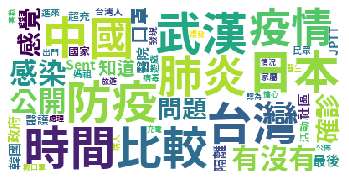

In [35]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


# mask = np.array(Image.open('Taiwan.jpg'))
font_file = 'TaipeiSansTCBeta-Bold.ttf'

wc = WordCloud(
  background_color='white',        #   背景顏色
  max_words=200,                   #   最大分詞數量
#   mask=mask,                       #   背景圖片
  max_font_size=None,              #   顯示字體的最大值
  font_path=font_file,             #   若為中文則需引入中文字型(.TTF)
  random_state=None,               #   隨機碼生成各分詞顏色
  prefer_horizontal=0.9)           #   調整分詞中水平和垂直的比例

show_top_keywords = ' '.join(top_keywords)
wc.generate(show_top_keywords)              #   須為字串且每個分詞以空白相隔


plt.imshow(wc)
plt.axis('off')
plt.show()